# OCR and text analysis on pdf files
This notebook uses Optical Character Recognition, using the Pytesseract library, a wrapper for Google's Tesseract OCR engine, which is based upon a long history of text recognition initially developed at Hewlett-Packard. Once made public, Google further developed this for several years as Tesseract, building more libraries to handle over 100 languages, which can be found the documentation: https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html<br>

#### references:
https://www.geeksforgeeks.org/python-reading-contents-of-pdf-using-ocr-optical-character-recognition/



#### more resources:
- [ ] https://pythonhealthcare.org/natural-language-processing/
- [ ] https://www.nltk.org/

#### dependencies:
- pytesseract
- tesseract
- pdf2image
- nltk
- seaborn

## Step 1: load the dedicated env and import libraries
You are looking at this file from GitHub.
- [ ] download instructions (save as, rename files) 
- [ ] or do we just email the folder link to participants?
## Install Anaconda
- [ ] link to anaconda.org and instructions on how to install and use it. 
- [ ] orientation to the environments tab and how it relates to the Home tab

### to import and create a new environment
Go to your Anaconda application and in the Environments section, select Import. Select the .yaml file. 

### to activate the environment
Anaconda will install all the libraries and dependencies needed. It should show as activated with a green arrow.

### open the jupyter notebook
In Anaconda, go to the Home section and launch Jupyter Notebook. Once your browser is open, go to your file location and open the notebook. 


In [2]:
# Import libraries
from PIL import Image
import pytesseract
import sys
from pdf2image import convert_from_path
import os

In [3]:
#set working directory - all files will be saved here
import os
os.chdir('/Users/nicolapoppy/Desktop/OCR')
os.getcwd()

'/Users/nicolapoppy/Desktop/OCR'

## Step 2: convert pdf to image files. 
Step 2 can take a while, so best to do one at a time for now...
<br> This will take your multi-page pdf and convert it into a .jpg for each page. 

In [63]:
 
# Path of the pdf
PDF_file = "6_1_1873.pdf"
  
# Store all the pages of the PDF in a variable
pages = convert_from_path(PDF_file, 500)
  
# Counter to store images of each page of PDF to image
image_counter = 1
  
# Iterate through all the pages stored above
for page in pages:
  
    # Declaring filename for each page of PDF as JPG
    # For each page, filename will be:
    # PDF page 1 -> page_1.jpg
    # PDF page 2 -> page_2.jpg
    # PDF page 3 -> page_3.jpg
    # ....
    # PDF page n -> page_n.jpg
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system
    page.save(filename, 'JPEG')
  
    # Increment the counter to update filename
    image_counter = image_counter + 1
  

## Step 3: interpreting text from the images using OCR and writing a .txt file

In [64]:

#suppress warnings about image size from PIL
Image.MAX_IMAGE_PIXELS = None   # disables the warning

# Variable to get count of total number of pages
filelimit = image_counter-1
  
# Creating a text file to write the output
outfile = "out_text.txt"
  
# Open the file in append mode so that 
# All contents of all images are added to the same file
f = open(outfile, "a")
  
# Iterate from 1 to total number of pages
for i in range(1, filelimit + 1):
  
    # Set filename to recognize text from
    # These files will be:
    # page_1.jpg
    # page_2.jpg
    # ....
    # page_n.jpg
    filename = "page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesserct
    text = str(((pytesseract.image_to_string(Image.open(filename)))))
  
    # The recognized text is stored in variable text
    # Any string processing may be applied on text
    # Here, basic formatting has been done:
    # In many PDFs, at line ending, if a word can't
    # be written fully, a 'hyphen' is added.
    # The rest of the word is written in the next line
    # Eg: This is a sample text this word here GeeksF-
    # orGeeks is half on first line, remaining on next.
    # To remove this, we replace every '-\n' to ''.
    text = text.replace('-\n', '')    
  
    # Finally, write the processed text to the file.
    f.write(text)
  
# Close the file after writing all the text.
f.close()

print('done - you should see a .txt file in your working directory')

done - you should see a .txt file in your working directory


### woo-hoo! You should see a successfully created .txt file in your folder. 
Now we move on to...
## Step 4: Import NLTK
you can find all the info here: https://www.nltk.org/
- if using this for the first time, a pop-up window from NLTK will appear. 
- select from the corpora tab, the stopwords corpus and download. 
- Once this is complete, you may close the window.

In [43]:
import nltk

In [44]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Step 5: NLP from .txt files
First we read in the text file

In [65]:
# file-input.py
f = open('out_text.txt','r')
text = f.read()
print(text)
f.close()

 

 

Vol. ¥i.

HALIFAX, NS. NOVEMBER 15, 1873.

No. 1.

 

 

CONVOCATION.

On Tuesday, November 4th, the meeting of the eleventh
session of Dalhousie College and University was held in
Argyle Hall. At 3 P. M., Professors and Students, im
academic costume, marched in procession from the College
building to the place of opening. ‘he number of friends
and citizens present showed that a deep and growing interest
is felt in behalf of our institution. The Very Rey. Principal
Ross, D. D., oceupied the chair, supported on the right by
His Honor, Lientenant Governor Archibald, and on the left
by Sir William Young, Chief Justice of Nova Scotia.

The opening prayer was offered by the Principal, invoking
the Divine Blessing upon the University ; asking. that the
Governors be endowed with wisdom, the Professors with
energy and discretion in the performance of their very important duties, and that the Students might be blessed with

health of body and soundnéss of mind in the acquisition of:

know

convert it all to lower case and print the length of the text file

In [66]:
text = text.lower()
print(len(text))

53055


## Step 6: clean out stopwords
This removes stopwords from the text. You can print out the stopwords below if you'd like to see them. 

In [67]:
from nltk.corpus import stopwords # import the stopwords corpus

print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
text_tokens = nltk.word_tokenize(text)

In [69]:
cleaned_tokens = [] # placeholder for the new tokens
for t in text_tokens:
    if t not in stopwords.words('english'): # check to see if it is in the stopwords corpus. If not, add it.
        cleaned_tokens.append(t) 

print(cleaned_tokens)

['vol', '.', '¥i', '.', 'halifax', ',', 'ns', '.', 'november', '15', ',', '1873.', '.', '1.', 'convocation', '.', 'tuesday', ',', 'november', '4th', ',', 'meeting', 'eleventh', 'session', 'dalhousie', 'college', 'university', 'held', 'argyle', 'hall', '.', '3', 'p.', 'm.', ',', 'professors', 'students', ',', 'im', 'academic', 'costume', ',', 'marched', 'procession', 'college', 'building', 'place', 'opening', '.', '‘', 'number', 'friends', 'citizens', 'present', 'showed', 'deep', 'growing', 'interest', 'felt', 'behalf', 'institution', '.', 'rey', '.', 'principal', 'ross', ',', 'd.', 'd.', ',', 'oceupied', 'chair', ',', 'supported', 'right', 'honor', ',', 'lientenant', 'governor', 'archibald', ',', 'left', 'sir', 'william', 'young', ',', 'chief', 'justice', 'nova', 'scotia', '.', 'opening', 'prayer', 'offered', 'principal', ',', 'invoking', 'divine', 'blessing', 'upon', 'university', ';', 'asking', '.', 'governors', 'endowed', 'wisdom', ',', 'professors', 'energy', 'discretion', 'perform

#### only include alphanumeric characters
This only includes alphabetical characters and does not include numberals, punctuation, or other un-recognized characters. <br>
- [ ] This could be improved to use regex, so that there is the option of keeping numerals

In [70]:
token_words = []
for w in cleaned_tokens:
    if w.isalpha():
        token_words.append(w)
    

In [71]:
token_words

['vol',
 'halifax',
 'ns',
 'november',
 'convocation',
 'tuesday',
 'november',
 'meeting',
 'eleventh',
 'session',
 'dalhousie',
 'college',
 'university',
 'held',
 'argyle',
 'hall',
 'professors',
 'students',
 'im',
 'academic',
 'costume',
 'marched',
 'procession',
 'college',
 'building',
 'place',
 'opening',
 'number',
 'friends',
 'citizens',
 'present',
 'showed',
 'deep',
 'growing',
 'interest',
 'felt',
 'behalf',
 'institution',
 'rey',
 'principal',
 'ross',
 'oceupied',
 'chair',
 'supported',
 'right',
 'honor',
 'lientenant',
 'governor',
 'archibald',
 'left',
 'sir',
 'william',
 'young',
 'chief',
 'justice',
 'nova',
 'scotia',
 'opening',
 'prayer',
 'offered',
 'principal',
 'invoking',
 'divine',
 'blessing',
 'upon',
 'university',
 'asking',
 'governors',
 'endowed',
 'wisdom',
 'professors',
 'energy',
 'discretion',
 'performance',
 'important',
 'duties',
 'students',
 'might',
 'blessed',
 'health',
 'body',
 'soundnéss',
 'mind',
 'acquisition',
 'kn

### Optional: 
Sometimes, the first section of pages include publisher or journal information that is not useful. You can use the following to remove a set number of words. If this is not needed, you may skip this step.

In [16]:
del token_words[:97]
token_words

['meanwhile',
 'similar',
 'arrangement',
 'brought',
 'enormous',
 'russian',
 'factory',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchase',
 'pounds',
 'day',
 'two',
 'species',
 'fishermen',
 'real',
 'problems',
 'selling',
 'previous',
 'years',
 'alongside',
 'local',
 'fishing',
 'vessels',
 'range',
 'feet',
 'russian',
 'trawler',
 'looks',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsails',
 'ton',
 'ship',
 'measures',
 'feet',
 'length',
 'carries',
 'crew',
 'russian',
 'vessel',
 'chartered',
 'swedish',
 'company',
 'entered',
 'contract',
 'nffaw',
 'purchase',
 'metric',
 'tons',
 'squid',
 'mackerel',
 'uic',
 'challenged',
 'simple',
 'error',
 'computer',
 'programmer',
 'ottawa',
 'year',
 'ago',
 'sparked',
 'unprecedented',
 'battle',
 'unemployment',
 'insurance',
 'commission',
 'uic',
 'nova',
 'scotia',
 'claimants',
 'mistake',
 'allowed',
 'people',
 'collect',
 'benefits',
 'raised',
 'legal',
 'moral',
 'politica

## Step 7: Stemming or Lemmatization?

There are differences between stemming and lemmatization. <br>
Stemming truncates the endings so that the stem of the word is the same. Such as 'study', 'studies', 'studying'. In this case stud is the stem. The challenge here is that contextual meaning can be easily lost, but it combines all these variations into one stem. Stemming also requires language-specific tools. In this case, we're calling the 'english' library of the snowball stemmer. <br>
#### Stemmer reference: 
https://www.nltk.org/howto/stem.html and <br>
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

<br>
Lemmatization on the other hand, takes contextual changes in words from their stems in consideration. This is particularly important for words that have noun/verb changes, such as in 'leaves'. As a noun, its base is 'leaf', but as a verb its 'leave'. <br>
Lemmatization uses dictionaries and different dictionaries are needed with different lanugages. 
#### Lemmatization reference:
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658 <br>
<br>
Of course, stemming and lemmatization are optional, but they can reduce the number of variations and reduce the amount of terms that are being analyzed. You should try both to see how this may affect your interpretation of topic models. 



### Stemming

In [72]:
#The snowball stemmer is considered to be more effective and accurate than the Porter Stemmer

from nltk.stem import SnowballStemmer 
stemming = SnowballStemmer("english") 


In [73]:
stemmed_list = [stemming.stem(word) for word in token_words]
stemmed_list

['vol',
 'halifax',
 'ns',
 'novemb',
 'convoc',
 'tuesday',
 'novemb',
 'meet',
 'eleventh',
 'session',
 'dalhousi',
 'colleg',
 'univers',
 'held',
 'argyl',
 'hall',
 'professor',
 'student',
 'im',
 'academ',
 'costum',
 'march',
 'process',
 'colleg',
 'build',
 'place',
 'open',
 'number',
 'friend',
 'citizen',
 'present',
 'show',
 'deep',
 'grow',
 'interest',
 'felt',
 'behalf',
 'institut',
 'rey',
 'princip',
 'ross',
 'oceupi',
 'chair',
 'support',
 'right',
 'honor',
 'lienten',
 'governor',
 'archibald',
 'left',
 'sir',
 'william',
 'young',
 'chief',
 'justic',
 'nova',
 'scotia',
 'open',
 'prayer',
 'offer',
 'princip',
 'invok',
 'divin',
 'bless',
 'upon',
 'univers',
 'ask',
 'governor',
 'endow',
 'wisdom',
 'professor',
 'energi',
 'discret',
 'perform',
 'import',
 'duti',
 'student',
 'might',
 'bless',
 'health',
 'bodi',
 'soundnéss',
 'mind',
 'acquisit',
 'knowledg',
 'fit',
 'prepar',
 'station',
 'trust',
 'use',
 'church',
 'state',
 'princip',
 'spea

### Lemmatization


In [54]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('omw-1.4')
# Since Lemmatization is based on WordNet's built-in morph function.

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicolapoppy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nicolapoppy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [74]:
lemmatizer = WordNetLemmatizer()   
#an instance of Word Net Lemmatizer
#This uses the part-of-speech tag, which preserves verb/noun differences
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "v") for word in token_words]
lemmatized_words_pos
#prints POS tagged lemmatized words

['vol',
 'halifax',
 'ns',
 'november',
 'convocation',
 'tuesday',
 'november',
 'meet',
 'eleventh',
 'session',
 'dalhousie',
 'college',
 'university',
 'hold',
 'argyle',
 'hall',
 'professors',
 'students',
 'im',
 'academic',
 'costume',
 'march',
 'procession',
 'college',
 'build',
 'place',
 'open',
 'number',
 'friends',
 'citizens',
 'present',
 'show',
 'deep',
 'grow',
 'interest',
 'felt',
 'behalf',
 'institution',
 'rey',
 'principal',
 'ross',
 'oceupied',
 'chair',
 'support',
 'right',
 'honor',
 'lientenant',
 'governor',
 'archibald',
 'leave',
 'sir',
 'william',
 'young',
 'chief',
 'justice',
 'nova',
 'scotia',
 'open',
 'prayer',
 'offer',
 'principal',
 'invoke',
 'divine',
 'bless',
 'upon',
 'university',
 'ask',
 'governors',
 'endow',
 'wisdom',
 'professors',
 'energy',
 'discretion',
 'performance',
 'important',
 'duties',
 'students',
 'might',
 'bless',
 'health',
 'body',
 'soundnéss',
 'mind',
 'acquisition',
 'knowledge',
 'fit',
 'prepare',
 'st

## Join
Let's join the list back togeter into one long thing<br>
the lists may be more effective...

In [75]:
joined_stem_words = ( " ".join(stemmed_list))
joined_stem_words

'vol halifax ns novemb convoc tuesday novemb meet eleventh session dalhousi colleg univers held argyl hall professor student im academ costum march process colleg build place open number friend citizen present show deep grow interest felt behalf institut rey princip ross oceupi chair support right honor lienten governor archibald left sir william young chief justic nova scotia open prayer offer princip invok divin bless upon univers ask governor endow wisdom professor energi discret perform import duti student might bless health bodi soundnéss mind acquisit knowledg fit prepar station trust use church state princip speak briefli univers general present favor condit probabl futur prospect introduc professor demil read excel inaugur publish leav speak simpli state sincer hope professor idea regard high school citi halifax provinci univers fit everi respect meet requir countri may taken handl proper author becom bless realiti professor sommer call upon give widress repres medic faculti be

In [76]:
joined_lemm_words = ( " ".join(lemmatized_words_pos))
joined_lemm_words

'vol halifax ns november convocation tuesday november meet eleventh session dalhousie college university hold argyle hall professors students im academic costume march procession college build place open number friends citizens present show deep grow interest felt behalf institution rey principal ross oceupied chair support right honor lientenant governor archibald leave sir william young chief justice nova scotia open prayer offer principal invoke divine bless upon university ask governors endow wisdom professors energy discretion performance important duties students might bless health body soundnéss mind acquisition knowledge fit prepare station trust usefulness church state principal speak briefly university general present favorable condition probable future prospect introduce professor demill read excellent inaugural publish leave speak simply state sincerely hope professor ideas regard high school city halifax provincial university fit every respect meet requirements country may

In [77]:
joined_token_words = ( " ".join(token_words))
joined_token_words

'vol halifax ns november convocation tuesday november meeting eleventh session dalhousie college university held argyle hall professors students im academic costume marched procession college building place opening number friends citizens present showed deep growing interest felt behalf institution rey principal ross oceupied chair supported right honor lientenant governor archibald left sir william young chief justice nova scotia opening prayer offered principal invoking divine blessing upon university asking governors endowed wisdom professors energy discretion performance important duties students might blessed health body soundnéss mind acquisition knowledge fitted prepare stations trust usefulness church state principal speaking briefly university general present favorable condition probable future prospects introduced professor demill read excellent inaugural publish leave speak simply stating sincerely hope professor ideas regard high school city halifax provincial university fi

In [78]:
#save out these as text files for further analysis
with open("joined_token_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_token_words))
    
with open("joined_lemm_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_lemm_words))
    
with open("joined_stem_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_stem_words))
    

## Step 8: Visualizing frequencies


#### check frequency
This will create a list of the 100 most common tokens

In [79]:
freq = nltk.FreqDist(lemmatized_words_pos)

print(freq.most_common(100))

[('college', 64), ('school', 42), ('one', 37), ('year', 32), ('may', 30), ('dalhousie', 29), ('study', 28), ('university', 26), ('halifax', 23), ('students', 23), ('make', 23), ('would', 22), ('latin', 21), ('number', 20), ('state', 20), ('time', 20), ('work', 19), ('city', 18), ('book', 18), ('upon', 17), ('us', 17), ('arts', 17), ('best', 17), ('education', 17), ('colleges', 17), ('take', 16), ('course', 16), ('give', 15), ('want', 15), ('new', 15), ('need', 15), ('student', 15), ('find', 14), ('say', 14), ('without', 14), ('must', 14), ('many', 14), ('men', 14), ('support', 13), ('come', 13), ('years', 13), ('much', 13), ('good', 13), ('go', 13), ('general', 12), ('high', 12), ('do', 12), ('receive', 12), ('denominational', 12), ('present', 11), ('leave', 11), ('call', 11), ('see', 11), ('natural', 11), ('seem', 11), ('age', 11), ('last', 10), ('increase', 10), ('great', 10), ('shall', 10), ('greek', 10), ('order', 10), ('meet', 9), ('fit', 9), ('hope', 9), ('regard', 9), ('every', 

## more visual resources
https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [61]:
import seaborn as sns
import pandas as p
import matplotlib.pyplot as plt

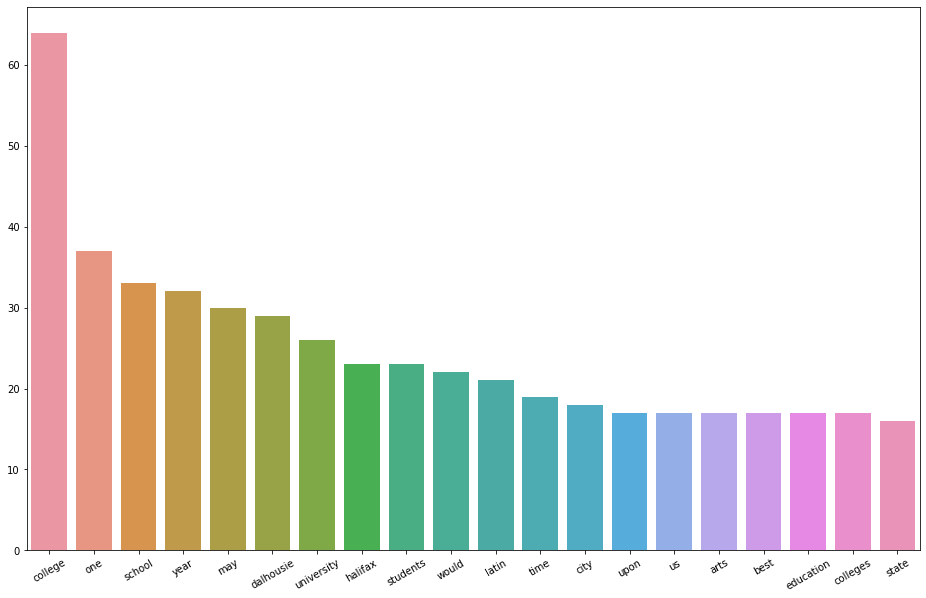

college       64
one           37
school        33
year          32
may           30
dalhousie     29
university    26
halifax       23
students      23
would         22
latin         21
time          19
city          18
upon          17
us            17
arts          17
best          17
education     17
colleges      17
state         16
dtype: int64

In [80]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(token_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(16,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

plt.savefig("top_20_tokens_from_" + PDF_file + ".png")
plt.show()

all_fdist.to_csv("top_20_tokens_from_" + PDF_file + ".csv")
all_fdist

## that's it!
You get the following from this notebook that can be used for further analysis:
- all_fdist.csv for the top twenty most frequent words
- all_fdist.png bar chart showing the top twenty most frequent words 
- joined word lists for the tokens, stemmed tokens, and lemmatized tokens as the text of the entire document saved as a continuous text
- the out.txt which is the original, unmodified text as interpreted by the OCR engine. This preserves the original structure and may be useful in certain analysis. 
<br>
<br>
Further analysis can compare the terms found in this article to others and rank them in importance, such as TF-IDF. Or the documents can be analyzed for topics and those topics compared against other documents using LDA with Spacey and Gensim. 